# THE SPARKS FOUNDATION : GRIPAUGUST21

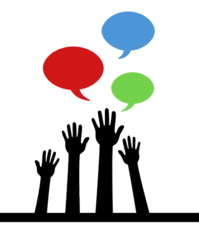

## TASK 2 : PREDICTION USING SUPERVISED ML

## AUTHOR : ANIRUDH GUPTA

## ALL THE PREREQUISITES

In [43]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
# Loading the data into a dataframe
url = "http://bit.ly/w-data"
df = pd.read_csv(url)


In [45]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## OVERALL STUDY OF THE DATA

In [46]:
df.shape

(25, 2)

#### Thus our data contains 25 rows and 2 columns

In [47]:
# Checking the data types of columns in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Thus data types of our columns are correct and they do not require any change

In [48]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Nothing in the above table requires our attention 

## CHECKING FOR THE DUPLICATES, MISSING VALUES AND BLANK SPACES

In [49]:
# Checking for the duplicate rows
df.duplicated().sum()

0

#### Thus there are no duplicate rows in our dataset

In [50]:
# Checking for the missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### Thus there are no null values in our dataset

In [51]:
# Checking for the blank spaces in our dataset. (We only have numeric datatype columns)
for i in df.columns:
    bs = df[i].astype(str).str.isspace().sum()
    print(i, bs)

Hours 0
Scores 0


#### Thus we see that there are no blank spaces in our dataset

## WE KNOW THAT FOR LINEAR REGRESSION MODEL, WE NEED TO TREAT THE OUTLIERS, SCALE THE NUMERIC VARIABLES AND THE TARGET VARIABLE MUST ALSO BE CLOSE TO A NORMAL DISTRIBUTION

## VARIABLE ANALYSIS

In [52]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Hours

In [53]:
# We will check for the outliers in this column and for this we will calculate percentiles
np.percentile(df["Hours"], range(1,101))

array([1.196, 1.292, 1.388, 1.484, 1.58 , 1.676, 1.772, 1.868, 1.996,
       2.14 , 2.284, 2.428, 2.5  , 2.5  , 2.5  , 2.5  , 2.516, 2.564,
       2.612, 2.66 , 2.7  , 2.7  , 2.7  , 2.7  , 2.7  , 2.82 , 2.94 ,
       3.06 , 3.18 , 3.22 , 3.244, 3.268, 3.292, 3.332, 3.38 , 3.428,
       3.476, 3.536, 3.608, 3.68 , 3.752, 3.856, 4.024, 4.192, 4.36 ,
       4.512, 4.584, 4.656, 4.728, 4.8  , 4.872, 4.944, 5.016, 5.088,
       5.18 , 5.276, 5.372, 5.468, 5.564, 5.66 , 5.756, 5.852, 5.924,
       5.972, 6.02 , 6.068, 6.164, 6.356, 6.548, 6.74 , 6.92 , 7.04 ,
       7.16 , 7.28 , 7.4  , 7.472, 7.544, 7.616, 7.688, 7.72 , 7.744,
       7.768, 7.792, 7.88 , 8.   , 8.12 , 8.24 , 8.324, 8.372, 8.42 ,
       8.468, 8.532, 8.628, 8.724, 8.82 , 8.912, 8.984, 9.056, 9.128,
       9.2  ])

#### Thus we see that there are no outliers here

### Scores

In [54]:
# We will check for the outliers in this column and for this we will calculate percentiles
np.percentile(df["Scores"], range(1,101))

array([17.72, 18.44, 19.16, 19.88, 20.2 , 20.44, 20.68, 20.92, 21.48,
       22.2 , 22.92, 23.64, 24.12, 24.36, 24.6 , 24.84, 25.16, 25.64,
       26.12, 26.6 , 27.12, 27.84, 28.56, 29.28, 30.  , 30.  , 30.  ,
       30.  , 30.  , 30.  , 30.  , 30.  , 30.  , 30.8 , 32.  , 33.2 ,
       34.4 , 35.72, 37.16, 38.6 , 40.04, 41.08, 41.32, 41.56, 41.8 ,
       42.2 , 43.4 , 44.6 , 45.8 , 47.  , 48.68, 50.36, 52.04, 53.72,
       55.2 , 56.64, 58.08, 59.52, 60.32, 60.8 , 61.28, 61.76, 62.6 ,
       63.8 , 65.  , 66.2 , 67.16, 67.64, 68.12, 68.6 , 69.24, 70.68,
       72.12, 73.56, 75.  , 75.24, 75.48, 75.72, 75.96, 77.  , 78.2 ,
       79.4 , 80.6 , 81.64, 82.6 , 83.56, 84.52, 85.12, 85.36, 85.6 ,
       85.84, 86.16, 86.64, 87.12, 87.6 , 88.28, 89.96, 91.64, 93.32,
       95.  ])

#### We see above that values after 89.96 are outliers

In [55]:
# Removing the outliers
df["Scores"][df["Scores"] >= 89.96] = 89.96

<ipython-input-55-e2a3644fdabf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Scores"][df["Scores"] >= 89.96] = 89.96


In [56]:
np.percentile(df["Scores"], range(1,101))

array([17.72  , 18.44  , 19.16  , 19.88  , 20.2   , 20.44  , 20.68  ,
       20.92  , 21.48  , 22.2   , 22.92  , 23.64  , 24.12  , 24.36  ,
       24.6   , 24.84  , 25.16  , 25.64  , 26.12  , 26.6   , 27.12  ,
       27.84  , 28.56  , 29.28  , 30.    , 30.    , 30.    , 30.    ,
       30.    , 30.    , 30.    , 30.    , 30.    , 30.8   , 32.    ,
       33.2   , 34.4   , 35.72  , 37.16  , 38.6   , 40.04  , 41.08  ,
       41.32  , 41.56  , 41.8   , 42.2   , 43.4   , 44.6   , 45.8   ,
       47.    , 48.68  , 50.36  , 52.04  , 53.72  , 55.2   , 56.64  ,
       58.08  , 59.52  , 60.32  , 60.8   , 61.28  , 61.76  , 62.6   ,
       63.8   , 65.    , 66.2   , 67.16  , 67.64  , 68.12  , 68.6   ,
       69.24  , 70.68  , 72.12  , 73.56  , 75.    , 75.24  , 75.48  ,
       75.72  , 75.96  , 77.    , 78.2   , 79.4   , 80.6   , 81.64  ,
       82.6   , 83.56  , 84.52  , 85.12  , 85.36  , 85.6   , 85.84  ,
       86.16  , 86.64  , 87.12  , 87.6   , 88.0784, 88.5488, 89.0192,
       89.4896, 89.9

C:\Users\Anirudh Gupta\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

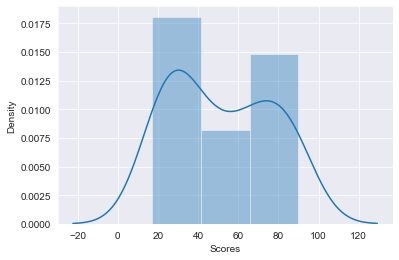

In [57]:
# Now we will check if our target variable follows normal distribution
sns.distplot(df["Scores"])

#### We see that our target variable is about normally distributed so we need not make any further changes

# VISUALIZING SCORES AGAINST HOURS


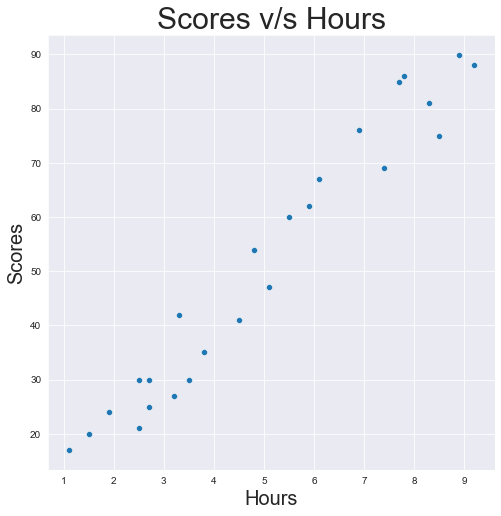

In [58]:
plt.figure(figsize= (8,8))
sns.set_style("darkgrid")
sns.scatterplot(x=df["Hours"], y= df["Scores"])
plt.xlabel("Hours", fontsize = 20)
plt.ylabel("Scores", fontsize = 20)
plt.title("Scores v/s Hours", fontsize = 30);

#### By looking at the visualization, we can say that a good linear regression model can built for the data

# SCALING THE NUMERIC VARIABLES

In [59]:
# Now we will be scaling our numeric variables and for that purpose , we will be using standard scalar

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
scaler = MinMaxScaler()

In [62]:
d = scaler.fit_transform(df)

In [63]:
df_f = pd.DataFrame(data=d, columns=df.columns)

In [64]:
df_f.head()

,Hours,Scores
0,0.172840,0.054825
1,0.493827,0.411184
2,0.259259,0.137061
3,0.913580,0.794956
4,0.296296,0.178180


#### We know that we will have to inverse transfor the transformed values so we will keep the min and max values for Hours and Scores with us from the original data

In [66]:
# Keeping the record of min, max and range values of Hours and Scores of original data
print("Minimum Hours {} \n Maximum Hours {} \n Range Hours {}".format(min(df["Hours"]), max(df["Hours"]), 
                                                                      max(df["Hours"])-min(df["Hours"])))

Minimum Hours 1.1 
 Maximum Hours 9.2 
 Range Hours 8.1


In [67]:
print("Minimum Scores {} \n Maximum Scores {} \n Range Scores {}".format(min(df["Scores"]), max(df["Scores"]), 
                                                                      max(df["Scores"])-min(df["Scores"])))

Minimum Scores 17.0 
 Maximum Scores 89.96 
 Range Scores 72.96


## SINCE WE HAVE ONLY ONE INDEPENDENT VARIABLE, WE NEED NOT CHECK FOR THE MULTICOLLINEARITY

## MODEL CREATION 

In [103]:
# Defining the dependent(y) and independent(x) variables
x = df_f.drop(columns=[
    "Scores"
])

In [104]:
y = df_f["Scores"]

In [ ]:
# We will now divide our data into train and test data

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.2, random_state=25)

In [107]:
from sklearn.linear_model import LinearRegression

In [109]:
lr = LinearRegression()

## FITTING THE MODEL ONTO THE TRAINING DATA AND CALCULATING THE SCORES

In [110]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [111]:
lr.score(xtrain,ytrain)

0.9549177073393278

In [112]:
lr.score(xtest,ytest)

0.9390203042548929

### Thus we are getting a very good score for training and test data

## VISUALIZING THE REGRESSION LINE

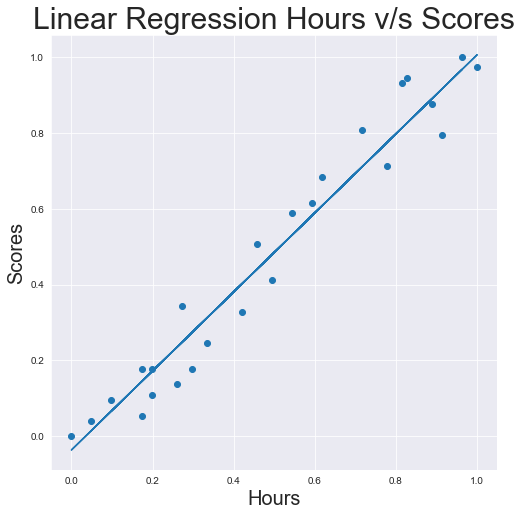

In [122]:
line = lr.coef_*x + lr.intercept_

plt.figure(figsize = (8,8))
plt.scatter(x,y)
plt.plot(x,line)
plt.xlabel("Hours", fontsize = 20)
plt.ylabel("Scores", fontsize = 20)
plt.title("Linear Regression Hours v/s Scores", fontsize = 30)
plt.show()


## MAKING THE PREDICTION ON TEST DATA AND CALCULATING THE METRICS

In [114]:
y_test_pred = lr.predict(xtest)

In [120]:
# Calculating the r squared and adjusted r squared
SS_Residual = sum((ytest-y_test_pred)**2)
SS_Total = sum((ytest-np.mean(ytest))**2)
#r_squared = 1 - (float(SS_Residual))/SS_Total
r_squared=(SS_Total-SS_Residual)/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1)
print (r_squared, adjusted_r_squared)

0.9390203042548929 0.9186937390065238


#### So for the test data, we have achieved r squared as 0.94(approx) and adjusted rsquared as 0.92(approx)

In [116]:
# Calculating MSE, RMSE and MAE for the test data
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_test_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_test_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_test_pred)))

Mean Absolute Error: 0.07432873485868102
Mean Squared Error: 0.0064746717505503775
Root Mean Squared Error: 0.08046534502846786


#### Thus we see that we are getting very low MAE and RMSE for the test data

## What will be predicted score if a student studies for 9.25 hrs/ day?

In [117]:
# Since we have supplied the scaled values to our model, we will have to scale 9.25 hrs to supply to our model 
sv = (9.25 - 1.1)/(8.1)
sv

1.0061728395061729

In [118]:
Final_Score = lr.predict([[sv]])
Final_Score[0]

1.0133203023541357

In [119]:
# We will now have to inverse transform the scaling of Final_Score
Final_Pred = Final_Score[0]*72.96 + 17
Final_Pred 

90.93184925975774

#### Thus if student studies for 9.25 hrs a day, he will be getting 90.93 score approximaltely